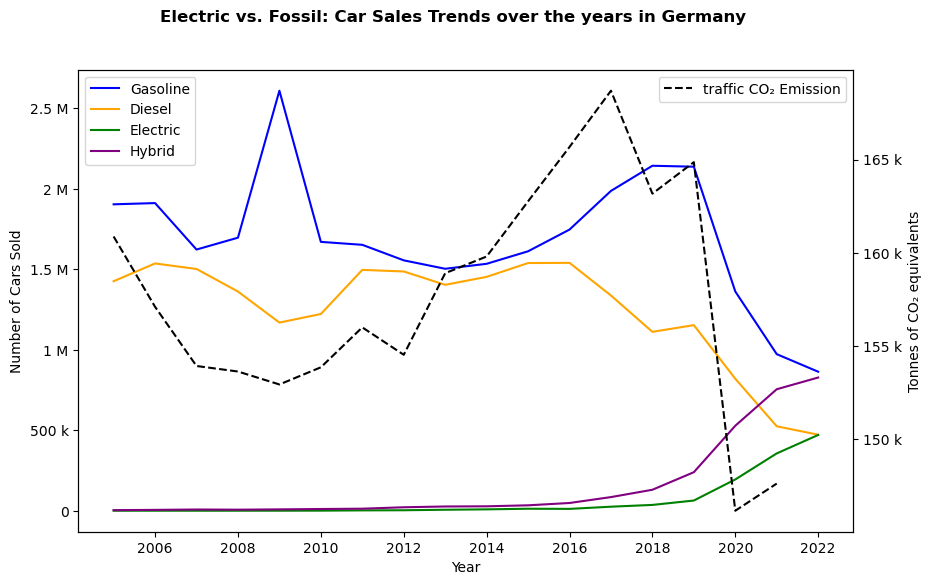

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import pandas as pd
from matplotlib.ticker import MaxNLocator

#importing Data from xlsx file
file_path = 'fz14_2022.xlsx'
sheet_name = 'FZ 14.2.1'

file_path_CO2 = '2_abb_anteil_verkehrsemissionen_thg_2023-04-28_0.xlsx'
sheet_name_CO2 = 'Daten'

df = pd.read_excel(file_path, sheet_name=sheet_name,skiprows=7,skipfooter=5)
df = df.rename(columns={'Jahr \n\n': 'Year', 'Benzin ': 'Gasoline', 'Elektro\n(BEV)': 'Electric', 'Hybrid\n': 'Hybrid'})

#Translating the header  from german to english

df=df.drop(0)

df=df[['Year','Gasoline','Diesel','Electric','Hybrid']]
df['Year']=df['Year'].astype(int)
df['Gasoline']=df['Gasoline'].astype(int)
df['Diesel']=df['Diesel'].astype(int)
df['Electric']=df['Electric'].astype(int)
df = df.set_index('Year')

# Read the second DataFrame
df_CO2 = pd.read_excel(file_path_CO2, sheet_name=sheet_name_CO2, skiprows=8)
df_CO2 = df_CO2.rename(columns={'Unnamed: 1': 'Year', 'Anteil Verkehrsemissionen': 'traffic Emission'})
df_CO2 = df_CO2[['Year', 'traffic Emission']]
df_CO2 = df_CO2.set_index('Year')
filtered_df_CO2 = pd.merge(df, df_CO2, left_index=True, right_index=True, how='inner')
filtered_df_CO2 = filtered_df_CO2[['traffic Emission']]
filtered_df_CO2 = filtered_df_CO2.reset_index()
df = df.reset_index()


# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Gasoline', ax=ax1, color='b', label='Gasoline')
sns.lineplot(data=df, x='Year', y='Diesel', ax=ax1, color='orange', label='Diesel')
sns.lineplot(data=df, x='Year', y='Electric', ax=ax1, color='green', label='Electric')
sns.lineplot(data=df, x='Year', y='Hybrid', ax=ax1, color='purple', label='Hybrid')
plt.legend(loc='upper left')
ax1.set_ylabel('Number of Cars Sold')
ax1.yaxis.set_major_formatter(ticker.EngFormatter())


ax2 = ax1.twinx()
sns.lineplot(data=filtered_df_CO2, x='Year', y='traffic Emission', ax=ax2, color='black', label='traffic CO₂ Emission', linestyle='--')
plt.legend(loc='upper right')
ax2.set_ylabel('Tonnes of CO₂ equivalents')
def format_yaxis(x, pos):
    return '{}K'.format(x)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis))


# Optional: Add title, labels, etc.
fig.suptitle('Electric vs. Fossil: Car Sales Trends over the years in Germany', fontweight='bold')
ax1.set_xlabel('Year')

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Show the plot
plt.show()